In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import mlc_func as mlcf
import numpy as np
import pandas as pd
import mlc_func_old as mlc_func
import shutil
%pylab inline

Using TensorFlow backend.


KeyboardInterrupt: 

In [2]:
def create_target_file(baseline, reference, output, offset = 0):
    targets = np.genfromtxt(reference, delimiter = ',') -\
        np.genfromtxt(baseline, delimiter = ',') - offset
    pd.DataFrame(targets).to_csv(output, index = None, header = None)

In [3]:
basepath_feat = '../publication/data/BH/elfs/'
basepath_tar =  '../publication/data/BH/'
basepath_ref = '../publication/data/MB-pol/'
systems = ['trimers','dimers','monomers']
# systems = ['trimers','dimers','monomers']
mono_offset = 469.79981032859143
n_mol = [3,2,1]
for s, nm in zip(systems, n_mol):
    create_target_file(basepath_tar +'/{}.energies'.format(s),
                      basepath_ref + '/{}.energies'.format(s),
                      basepath_tar +'/{}.energy_targets'.format(s), mono_offset*nm)
        
feature_src = [basepath_feat + s +'_processed.hdf5' for s in systems]
target_src = [basepath_tar +'/' + s +'.energy_targets' for s in systems]
filters = [np.genfromtxt('../publication/data/filters/{}.filter'.format(s), dtype =bool) for s in systems[:]]
# filters.append([True]*50)
nn = mlcf.ml.build_energy_mlcf(feature_src, target_src, automask_std = 1e-3, filters = [],
                                          autofilt_percent=0.001)


{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
scale_together


In [4]:
nn.train(step_size=0.001, max_steps= 160001 ,b_=[1e-8, 1e-8], multiplier=[1,1,1])

multipliers: [1, 1, 1]
Step: 0
Training set loss:
0: 8.9976167678833
1: 5.977449893951416
2: 2.9856009483337402
Total: 11.20717716217041
Validation set loss:
0: 9.011062622070312
1: 5.981118679046631
2: 2.983497381210327
Total: 11.219371795654297
--------------------
L2-loss: 1.8312102838535793e-06


KeyboardInterrupt: 

===========trimers===========
RMSE: 2.72 (27.65)
MAX: 13.58 (78.68)
MAE: 2.11 (21.86)
===========dimers===========
RMSE: 4.53 (39.40)
MAX: 36.09 (154.82)
MAE: 3.35 (30.94)
===========monomers===========
RMSE: 2.42 (58.40)
MAX: 19.38 (167.36)
MAE: 1.66 (46.86)


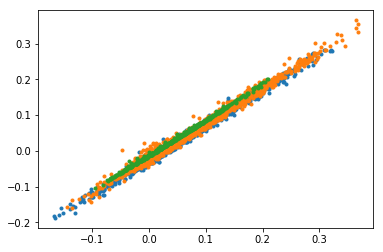

In [42]:
n_mol_dict = {'monomers' : 1, 'dimers': 2,'trimers': 3}
for i in range(3):
    plot(nn.get_logits(which='train')[i], nn.subnets[i][0].y_train, ls = '', marker = '.')
    dev = (nn.get_logits(which='train')[i] - nn.subnets[i][0].y_train)/n_mol_dict[systems[i]]*1000
    dev_bh = nn.subnets[i][0].y_train/n_mol_dict[systems[i]]*1000
    dev -= np.mean(dev)
    dev_bh -= np.mean(dev_bh)
    print('==========={}==========='.format(systems[i]))
    print('RMSE: {:3.2f} ({:3.2f})'.format(np.std(dev),np.std(dev_bh)))
    print('MAX: {:3.2f} ({:3.2f})'.format(np.max(np.abs(dev)),np.max(np.abs(dev_bh))))
    print('MAE: {:3.2f} ({:3.2f})'.format(np.mean(np.abs(dev)),np.mean(np.abs(dev_bh))))

In [9]:
nn.save_all('../publication/models/bh_qz_to_mbp_select/', override=True)

Overriding...
